In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure

In [3]:
def read_file(filename):
    photon_E, total_yield, yield_error = [],[],[]

    copy_lines=[]
    with open(filename) as f:
        lines = f.readlines()

    for line in lines:
        split_line = line.split()
        copy_lines.append(split_line)

    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one
        line = copy_lines[i]

        photon_E.append(line[0]) #strip element name and type of commas
        total_yield.append(line[1])
        yield_error.append(line[2])

#extracted values are strings --> cast numbers to floats
    for i in range(0, len(photon_E)):
        photon_E[i] = float(photon_E[i])
        total_yield[i] = float(total_yield[i])
        yield_error[i] = float(yield_error[i])

    return([photon_E, total_yield, yield_error])

In [4]:
def convert_eV_to_wavelength(energy_eV_list):
    # a simple function that takes a list with photon energy values (in eV) and converts them into wavelength in nanometers
    eV = 1.602*10e-19 #Joule, electronvolt
    h = 6.62607004*10e-34 #J*s, planck constant
    c = 3*10e8 #m/s', speed of light
    wavelength_list = []
    for datapoint in energy_eV_list:
        energy_J = datapoint * eV
        wavelength_list.append(h*c/energy_J/(10e-9)) #in nm
    return(wavelength_list)

# GOLD

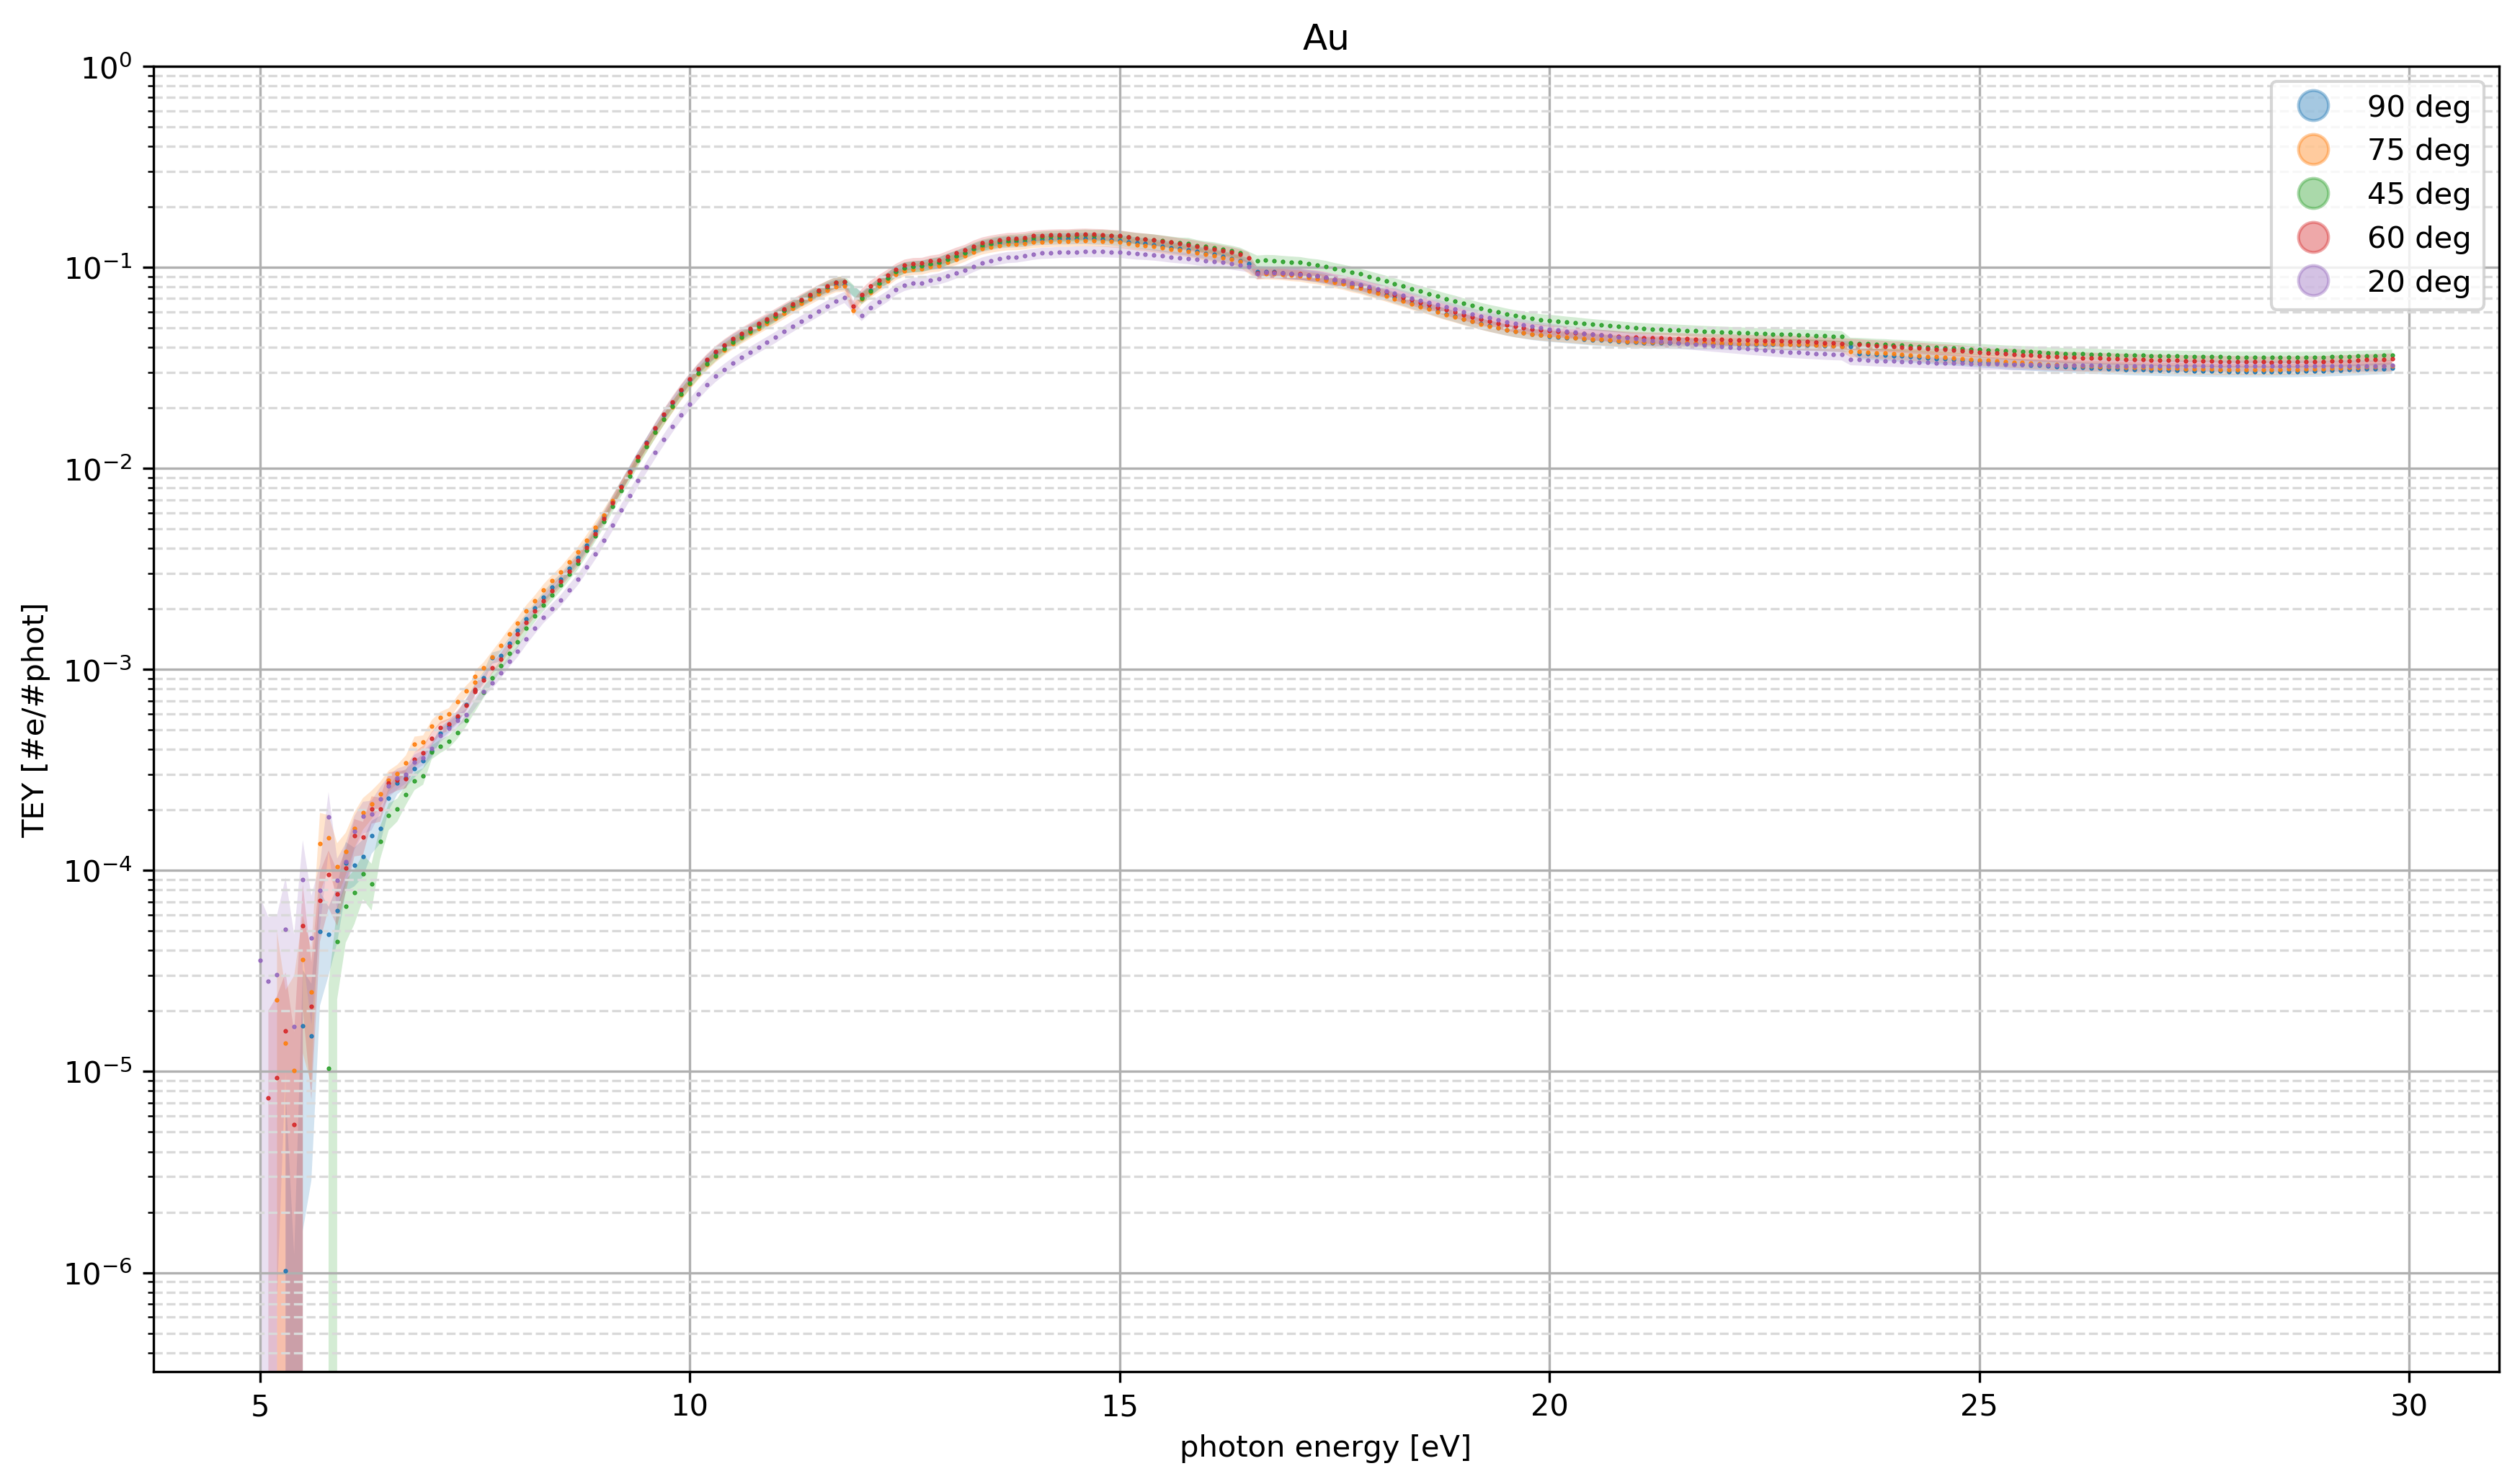

In [5]:
[Au_90_E, Au_90_TEY, Au_90_TEY_err] = read_file('TEY_files/Au_90deg.txt')
[Au_45_E, Au_45_TEY, Au_45_TEY_err] = read_file('TEY_files/Au_45deg.txt')
[Au_75_E, Au_75_TEY, Au_75_TEY_err] = read_file('TEY_files/Au_75deg.txt')
[Au_60_E, Au_60_TEY, Au_60_TEY_err] = read_file('TEY_files/Au_60deg.txt')
[Au_20_E, Au_20_TEY, Au_20_TEY_err] = read_file('TEY_files/Au_20deg.txt')

figure(figsize=(14, 8), dpi=300)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Au_90_E,Au_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Au_90_E, [i-j for i,j in zip(Au_90_TEY,Au_90_TEY_err)], [i+j for i,j in zip(Au_90_TEY,Au_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Au_75_E,Au_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(Au_75_E, [i-j for i,j in zip(Au_75_TEY,Au_75_TEY_err)], [i+j for i,j in zip(Au_75_TEY,Au_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Au_45_E,Au_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Au_45_E, [i-j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], [i+j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Au_60_E,Au_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(Au_60_E, [i-j for i,j in zip(Au_60_TEY,Au_60_TEY_err)], [i+j for i,j in zip(Au_60_TEY,Au_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Au_20_E,Au_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Au_20_E, [i-j for i,j in zip(Au_20_TEY,Au_20_TEY_err)], [i+j for i,j in zip(Au_20_TEY,Au_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Au')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Au.png', dpi=300)


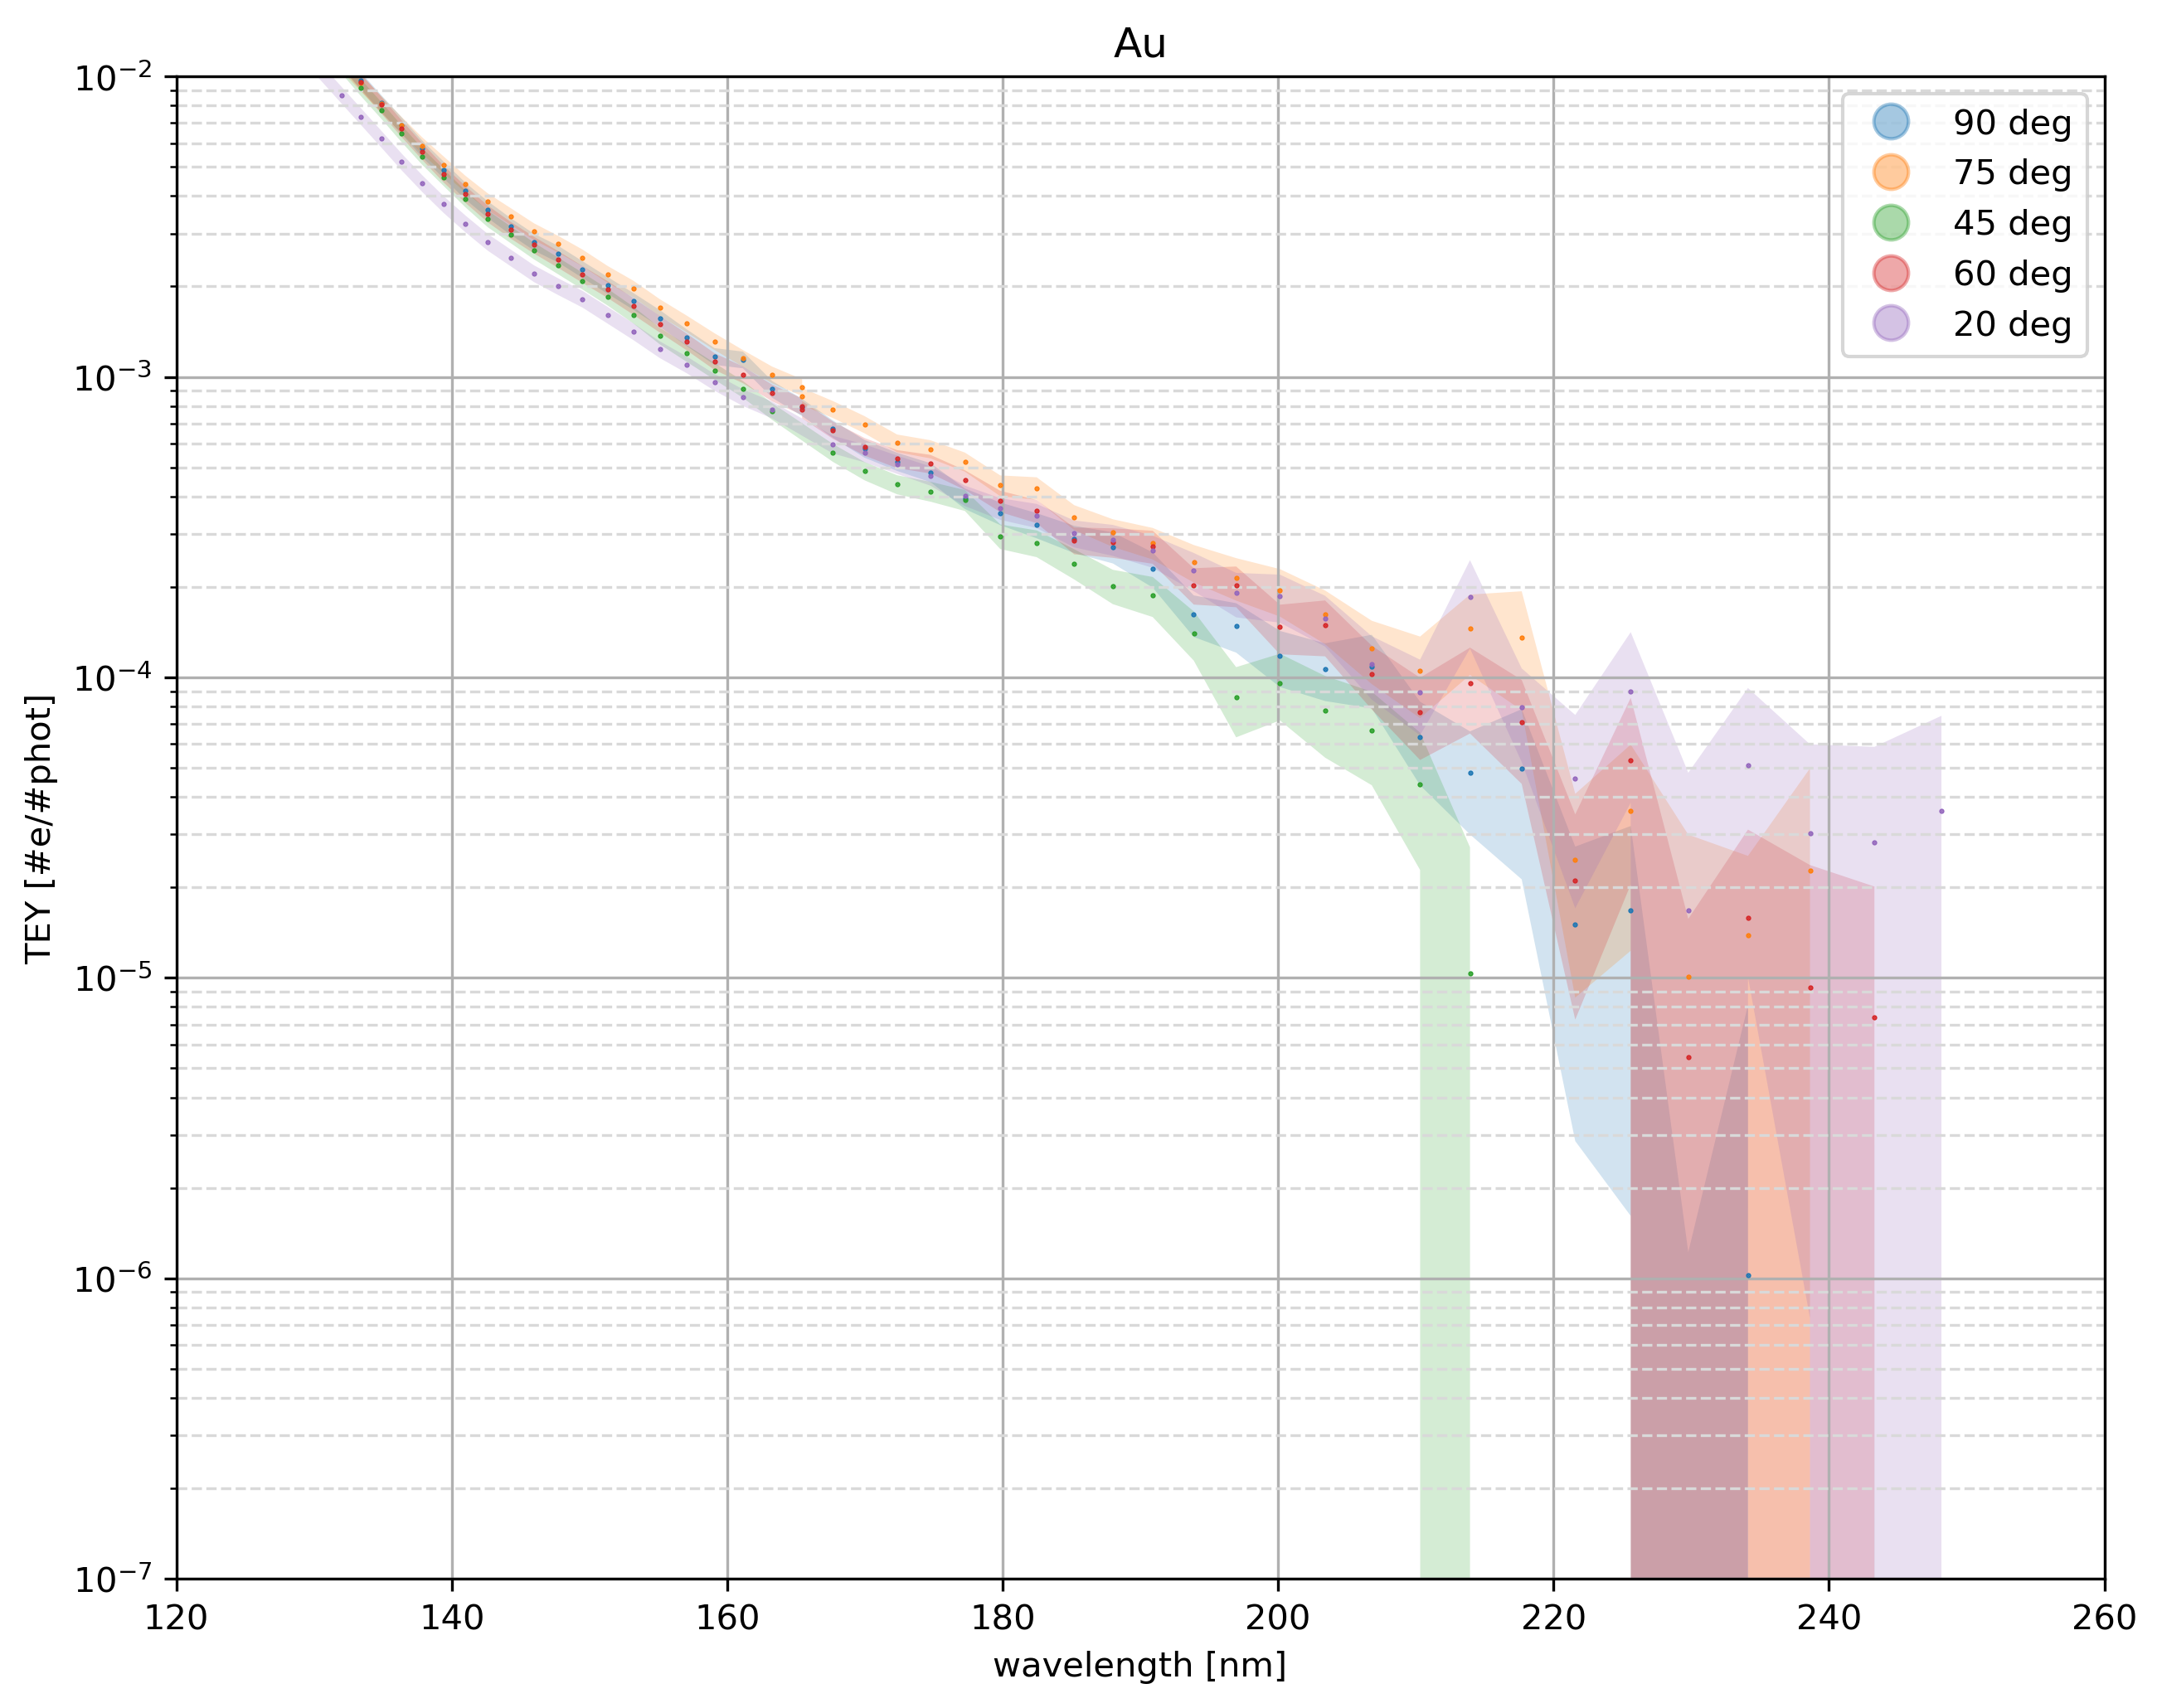

In [6]:
figure(figsize=(10, 8), dpi=300)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(convert_eV_to_wavelength(Au_90_E),Au_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(convert_eV_to_wavelength(Au_90_E), [i-j for i,j in zip(Au_90_TEY,Au_90_TEY_err)], [i+j for i,j in zip(Au_90_TEY,Au_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Au_75_E),Au_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(convert_eV_to_wavelength(Au_75_E), [i-j for i,j in zip(Au_75_TEY,Au_75_TEY_err)], [i+j for i,j in zip(Au_75_TEY,Au_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Au_45_E),Au_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(convert_eV_to_wavelength(Au_45_E), [i-j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], [i+j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Au_60_E),Au_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(convert_eV_to_wavelength(Au_60_E), [i-j for i,j in zip(Au_60_TEY,Au_60_TEY_err)], [i+j for i,j in zip(Au_60_TEY,Au_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Au_20_E),Au_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(convert_eV_to_wavelength(Au_20_E), [i-j for i,j in zip(Au_20_TEY,Au_20_TEY_err)], [i+j for i,j in zip(Au_20_TEY,Au_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('wavelength [nm]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Au')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

plt.xlim(120, 260)
plt.ylim(1e-7, 1e-2)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Au_lit_comparison.png', dpi=300)

# Silver

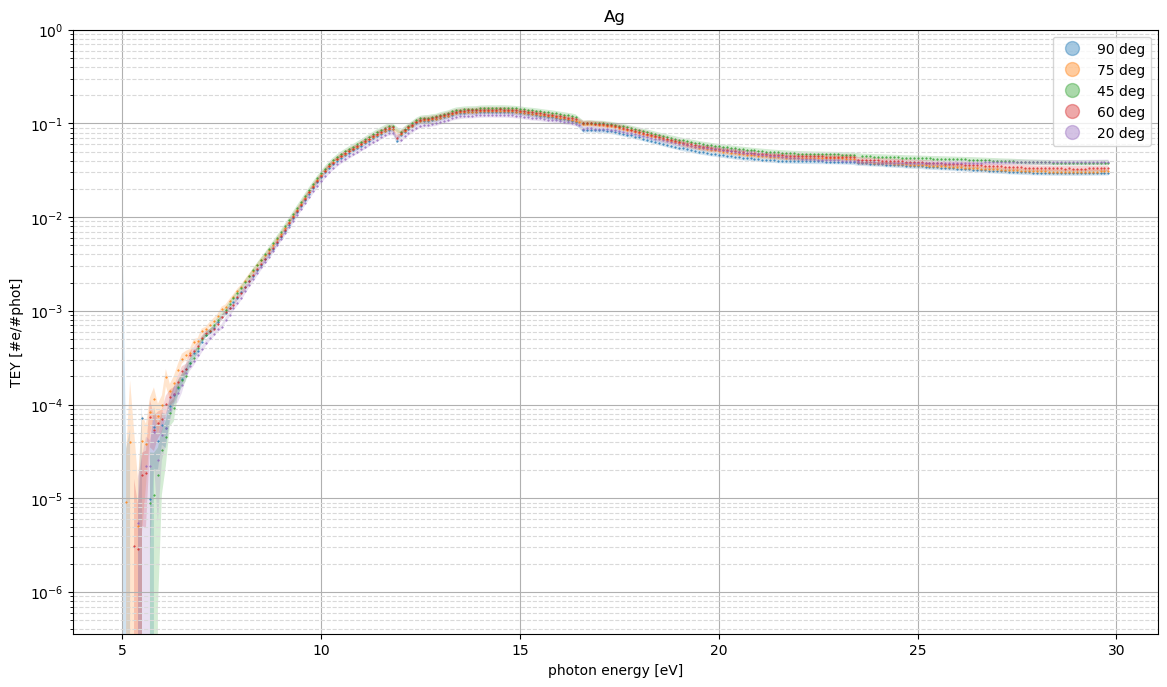

In [7]:
[Ag_90_E, Ag_90_TEY, Ag_90_TEY_err] = read_file('TEY_files/Ag_90deg.txt')
[Ag_45_E, Ag_45_TEY, Ag_45_TEY_err] = read_file('TEY_files/Ag_45deg.txt')
[Ag_75_E, Ag_75_TEY, Ag_75_TEY_err] = read_file('TEY_files/Ag_75deg.txt')
[Ag_60_E, Ag_60_TEY, Ag_60_TEY_err] = read_file('TEY_files/Ag_60deg.txt')
[Ag_20_E, Ag_20_TEY, Ag_20_TEY_err] = read_file('TEY_files/Ag_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Ag_90_E,Ag_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Ag_90_E, [i-j for i,j in zip(Ag_90_TEY,Ag_90_TEY_err)], [i+j for i,j in zip(Ag_90_TEY,Ag_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Ag_75_E,Ag_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(Ag_75_E, [i-j for i,j in zip(Ag_75_TEY,Ag_75_TEY_err)], [i+j for i,j in zip(Ag_75_TEY,Ag_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Ag_45_E,Ag_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Ag_45_E, [i-j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], [i+j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Ag_60_E,Ag_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(Ag_60_E, [i-j for i,j in zip(Ag_60_TEY,Ag_60_TEY_err)], [i+j for i,j in zip(Ag_60_TEY,Ag_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Ag_20_E,Ag_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Ag_20_E, [i-j for i,j in zip(Ag_20_TEY,Ag_20_TEY_err)], [i+j for i,j in zip(Ag_20_TEY,Ag_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Ag')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Ag.png', dpi=300)

# ITO Radiator 1:

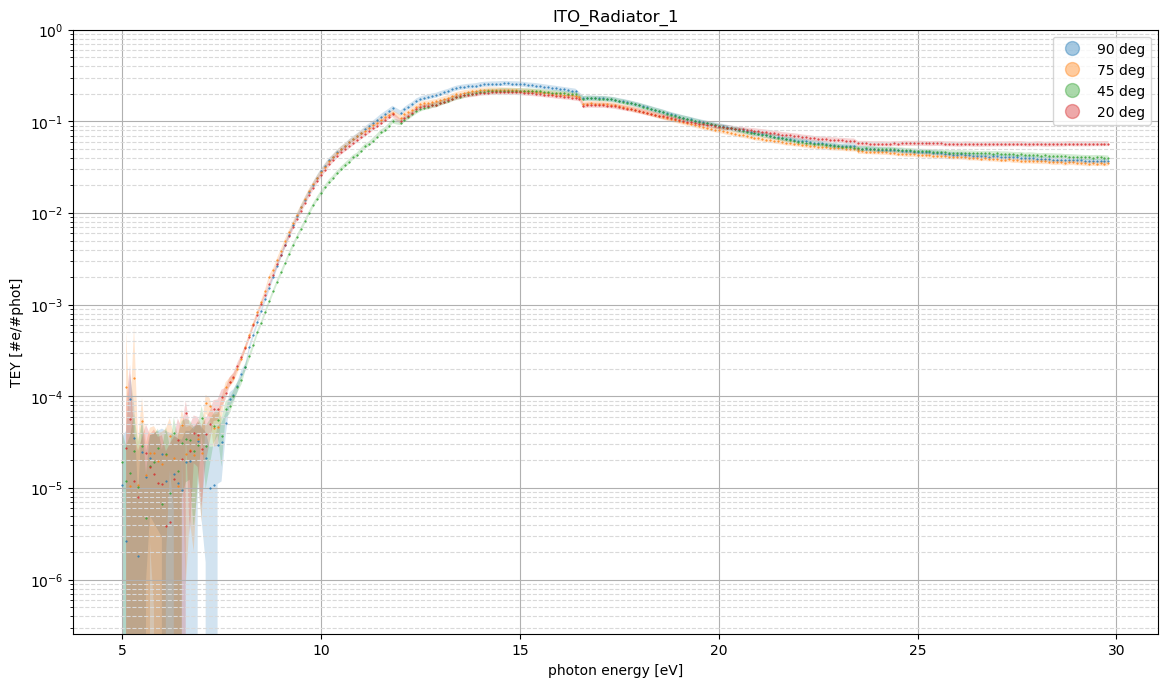

In [8]:
[ITO_Radiator_1_90_E, ITO_Radiator_1_90_TEY, ITO_Radiator_1_90_TEY_err] = read_file('TEY_files/ITO_Radiator_1_90deg.txt')
[ITO_Radiator_1_45_E, ITO_Radiator_1_45_TEY, ITO_Radiator_1_45_TEY_err] = read_file('TEY_files/ITO_Radiator_1_45deg.txt')
[ITO_Radiator_1_75_E, ITO_Radiator_1_75_TEY, ITO_Radiator_1_75_TEY_err] = read_file('TEY_files/ITO_Radiator_1_75deg.txt')
[ITO_Radiator_1_20_E, ITO_Radiator_1_20_TEY, ITO_Radiator_1_20_TEY_err] = read_file('TEY_files/ITO_Radiator_1_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(ITO_Radiator_1_90_E,ITO_Radiator_1_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(ITO_Radiator_1_90_E, [i-j for i,j in zip(ITO_Radiator_1_90_TEY,ITO_Radiator_1_90_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_90_TEY,ITO_Radiator_1_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_1_75_E,ITO_Radiator_1_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(ITO_Radiator_1_75_E, [i-j for i,j in zip(ITO_Radiator_1_75_TEY,ITO_Radiator_1_75_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_75_TEY,ITO_Radiator_1_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_1_45_E,ITO_Radiator_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(ITO_Radiator_1_45_E, [i-j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_1_20_E,ITO_Radiator_1_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(ITO_Radiator_1_20_E, [i-j for i,j in zip(ITO_Radiator_1_20_TEY,ITO_Radiator_1_20_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_20_TEY,ITO_Radiator_1_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO_Radiator_1')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/ITO_Radiator_1.png', dpi=300)

# ITO Radiator 2:

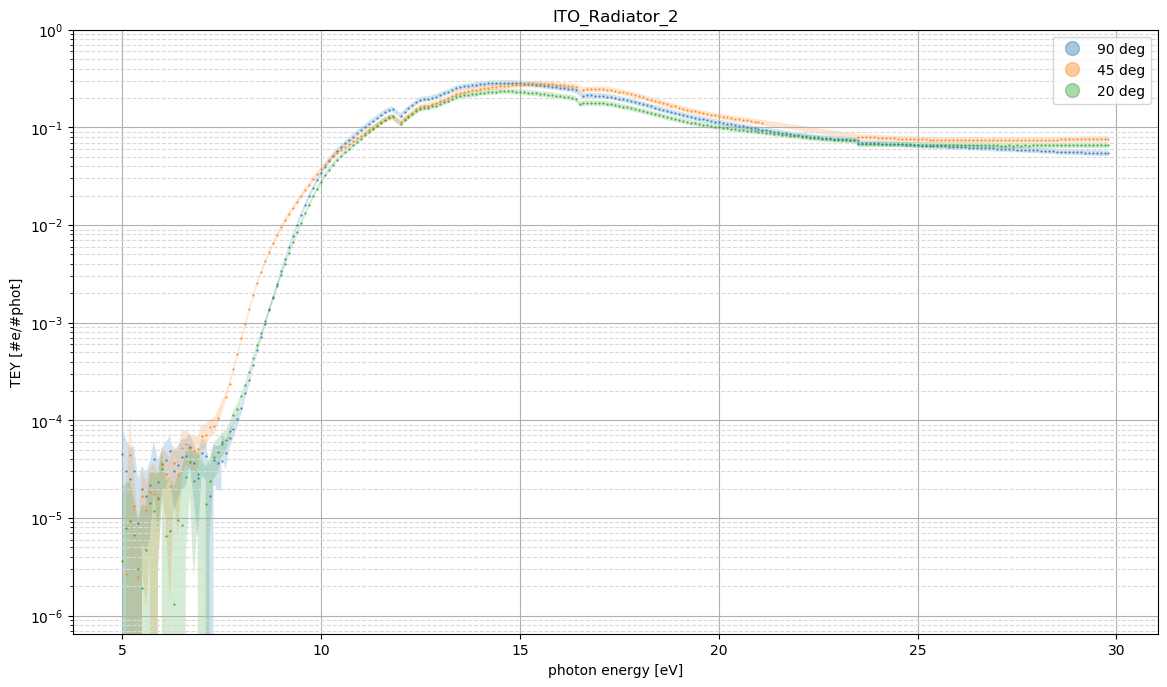

In [9]:
[ITO_Radiator_2_90_E, ITO_Radiator_2_90_TEY, ITO_Radiator_2_90_TEY_err] = read_file('TEY_files/ITO_Radiator_2_90deg.txt')
[ITO_Radiator_2_45_E, ITO_Radiator_2_45_TEY, ITO_Radiator_2_45_TEY_err] = read_file('TEY_files/ITO_Radiator_2_45deg.txt')
[ITO_Radiator_2_20_E, ITO_Radiator_2_20_TEY, ITO_Radiator_2_20_TEY_err] = read_file('TEY_files/ITO_Radiator_2_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(ITO_Radiator_2_90_E,ITO_Radiator_2_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(ITO_Radiator_2_90_E, [i-j for i,j in zip(ITO_Radiator_2_90_TEY,ITO_Radiator_2_90_TEY_err)], [i+j for i,j in zip(ITO_Radiator_2_90_TEY,ITO_Radiator_2_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_2_45_E,ITO_Radiator_2_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(ITO_Radiator_2_45_E, [i-j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_2_20_E,ITO_Radiator_2_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(ITO_Radiator_2_20_E, [i-j for i,j in zip(ITO_Radiator_2_20_TEY,ITO_Radiator_2_20_TEY_err)], [i+j for i,j in zip(ITO_Radiator_2_20_TEY,ITO_Radiator_2_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO_Radiator_2')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/ITO_Radiator_2.png', dpi=300)

# Aerodag_SS:

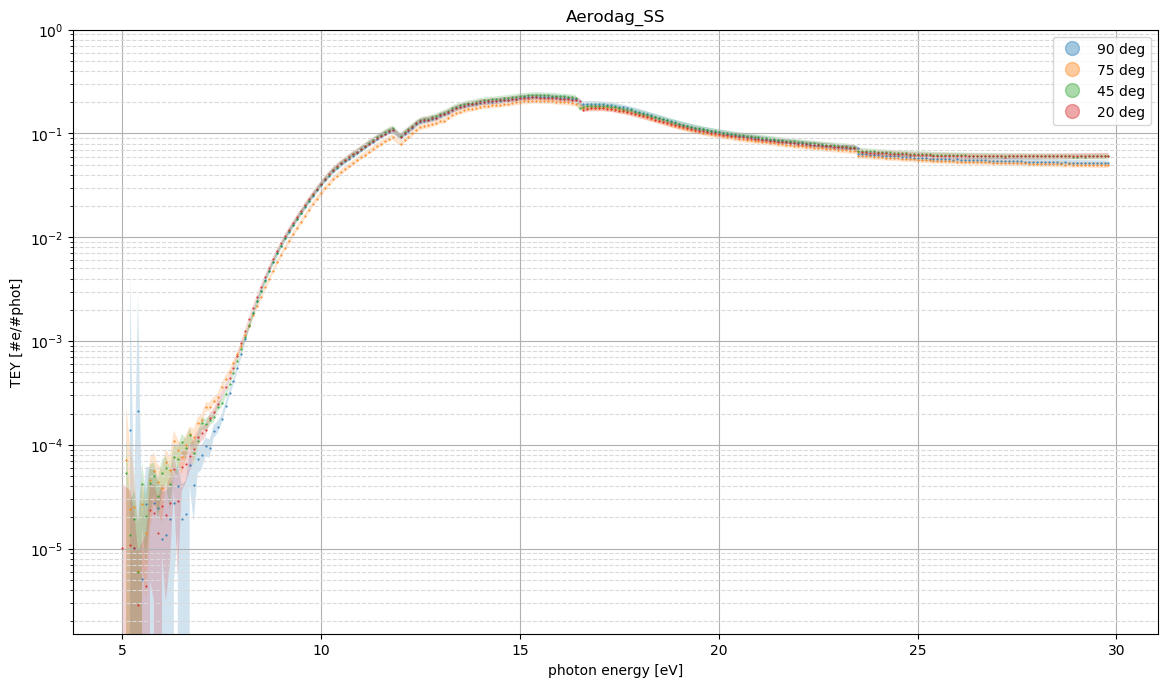

In [10]:
[Aerodag_SS_90_E, Aerodag_SS_90_TEY, Aerodag_SS_90_TEY_err] = read_file('TEY_files/Aerodag_SS_90deg.txt')
[Aerodag_SS_45_E, Aerodag_SS_45_TEY, Aerodag_SS_45_TEY_err] = read_file('TEY_files/Aerodag_SS_45deg.txt')
[Aerodag_SS_75_E, Aerodag_SS_75_TEY, Aerodag_SS_75_TEY_err] = read_file('TEY_files/Aerodag_SS_75deg.txt')
[Aerodag_SS_20_E, Aerodag_SS_20_TEY, Aerodag_SS_20_TEY_err] = read_file('TEY_files/Aerodag_SS_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Aerodag_SS_90_E,Aerodag_SS_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Aerodag_SS_90_E, [i-j for i,j in zip(Aerodag_SS_90_TEY,Aerodag_SS_90_TEY_err)], [i+j for i,j in zip(Aerodag_SS_90_TEY,Aerodag_SS_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_SS_75_E,Aerodag_SS_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(Aerodag_SS_75_E, [i-j for i,j in zip(Aerodag_SS_75_TEY,Aerodag_SS_75_TEY_err)], [i+j for i,j in zip(Aerodag_SS_75_TEY,Aerodag_SS_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_SS_45_E,Aerodag_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Aerodag_SS_45_E, [i-j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], [i+j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_SS_20_E,Aerodag_SS_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Aerodag_SS_20_E, [i-j for i,j in zip(Aerodag_SS_20_TEY,Aerodag_SS_20_TEY_err)], [i+j for i,j in zip(Aerodag_SS_20_TEY,Aerodag_SS_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Aerodag_SS')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Aerodag_SS.png', dpi=300)

# Aerodag_Al:

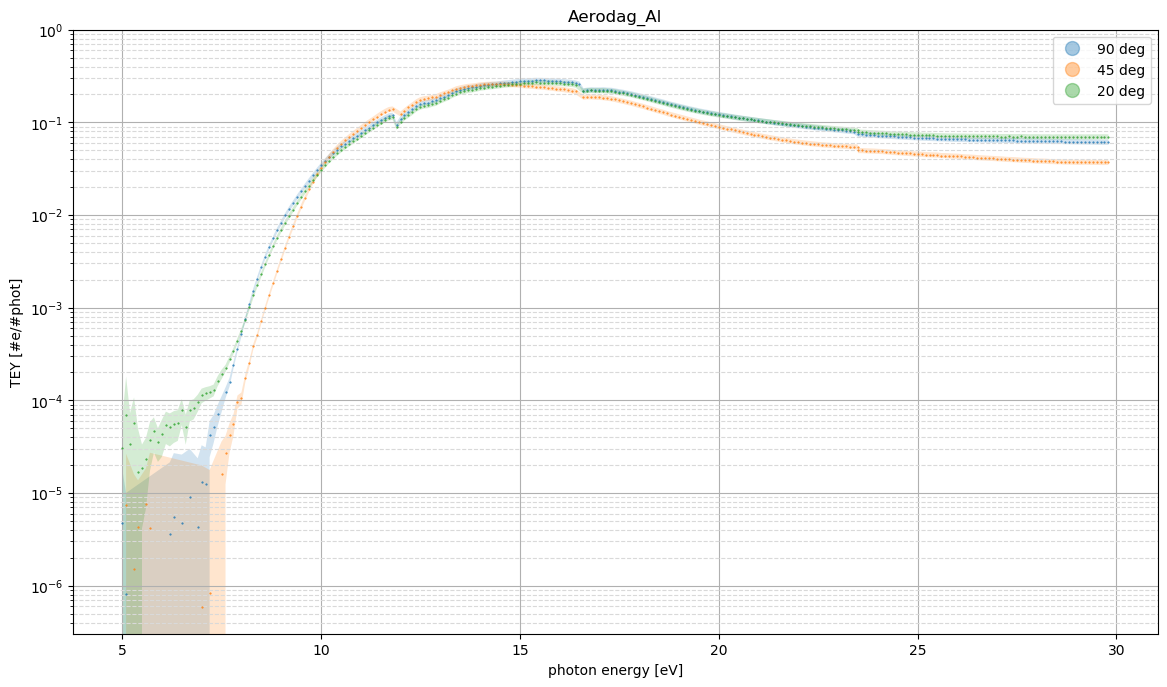

In [11]:
[Aerodag_Al_90_E, Aerodag_Al_90_TEY, Aerodag_Al_90_TEY_err] = read_file('TEY_files/Aerodag_Al_90deg.txt')
[Aerodag_Al_45_E, Aerodag_Al_45_TEY, Aerodag_Al_45_TEY_err] = read_file('TEY_files/Aerodag_Al_45deg.txt')
[Aerodag_Al_20_E, Aerodag_Al_20_TEY, Aerodag_Al_20_TEY_err] = read_file('TEY_files/Aerodag_Al_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Aerodag_Al_90_E,Aerodag_Al_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Aerodag_Al_90_E, [i-j for i,j in zip(Aerodag_Al_90_TEY,Aerodag_Al_90_TEY_err)], [i+j for i,j in zip(Aerodag_Al_90_TEY,Aerodag_Al_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_Al_45_E,Aerodag_Al_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Aerodag_Al_45_E, [i-j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], [i+j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_Al_20_E,Aerodag_Al_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Aerodag_Al_20_E, [i-j for i,j in zip(Aerodag_Al_20_TEY,Aerodag_Al_20_TEY_err)], [i+j for i,j in zip(Aerodag_Al_20_TEY,Aerodag_Al_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Aerodag_Al')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Aerodag_Al.png', dpi=300)

# Graphite SS:

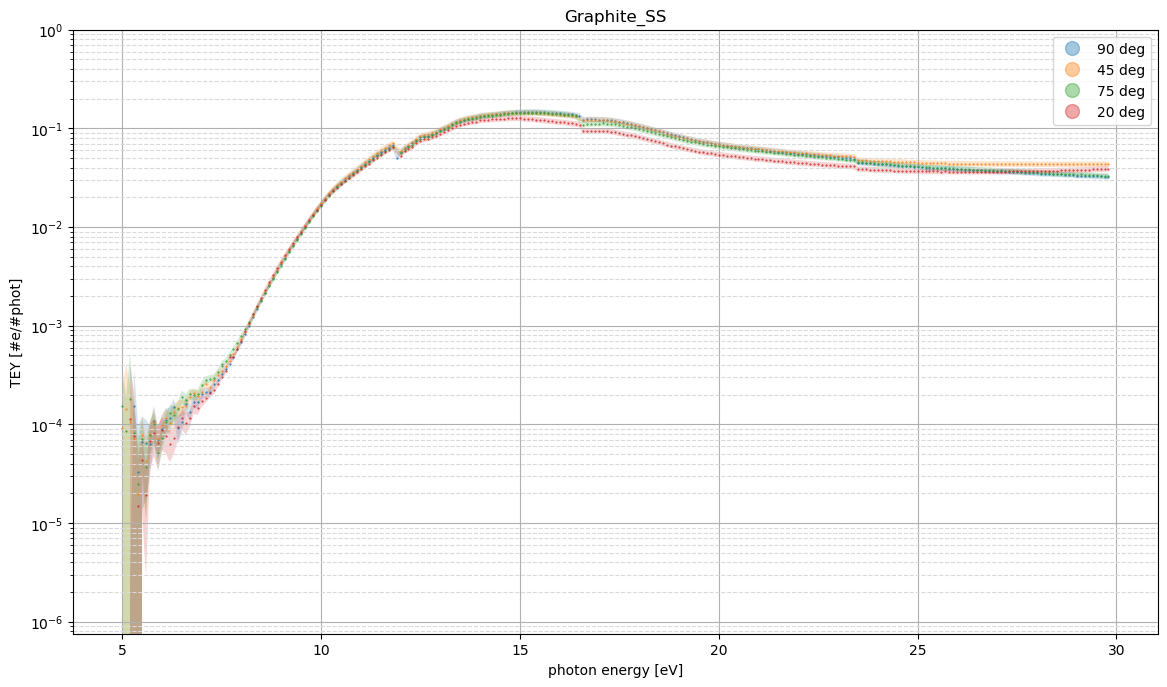

In [12]:
[Graphite_SS_90_E, Graphite_SS_90_TEY, Graphite_SS_90_TEY_err] = read_file('TEY_files/Graphite_SS_90deg.txt')
[Graphite_SS_45_E, Graphite_SS_45_TEY, Graphite_SS_45_TEY_err] = read_file('TEY_files/Graphite_SS_45deg.txt')
[Graphite_SS_75_E, Graphite_SS_75_TEY, Graphite_SS_75_TEY_err] = read_file('TEY_files/Graphite_SS_75deg.txt')
[Graphite_SS_20_E, Graphite_SS_20_TEY, Graphite_SS_20_TEY_err] = read_file('TEY_files/Graphite_SS_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Graphite_SS_90_E,Graphite_SS_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Graphite_SS_90_E, [i-j for i,j in zip(Graphite_SS_90_TEY,Graphite_SS_90_TEY_err)], [i+j for i,j in zip(Graphite_SS_90_TEY,Graphite_SS_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Graphite_SS_45_E,Graphite_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Graphite_SS_45_E, [i-j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], [i+j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Graphite_SS_75_E,Graphite_SS_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(Graphite_SS_75_E, [i-j for i,j in zip(Graphite_SS_75_TEY,Graphite_SS_75_TEY_err)], [i+j for i,j in zip(Graphite_SS_75_TEY,Graphite_SS_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Graphite_SS_20_E,Graphite_SS_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Graphite_SS_20_E, [i-j for i,j in zip(Graphite_SS_20_TEY,Graphite_SS_20_TEY_err)], [i+j for i,j in zip(Graphite_SS_20_TEY,Graphite_SS_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Graphite_SS')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Graphite_SS.png', dpi=300)

# ITO MLI (original sample):

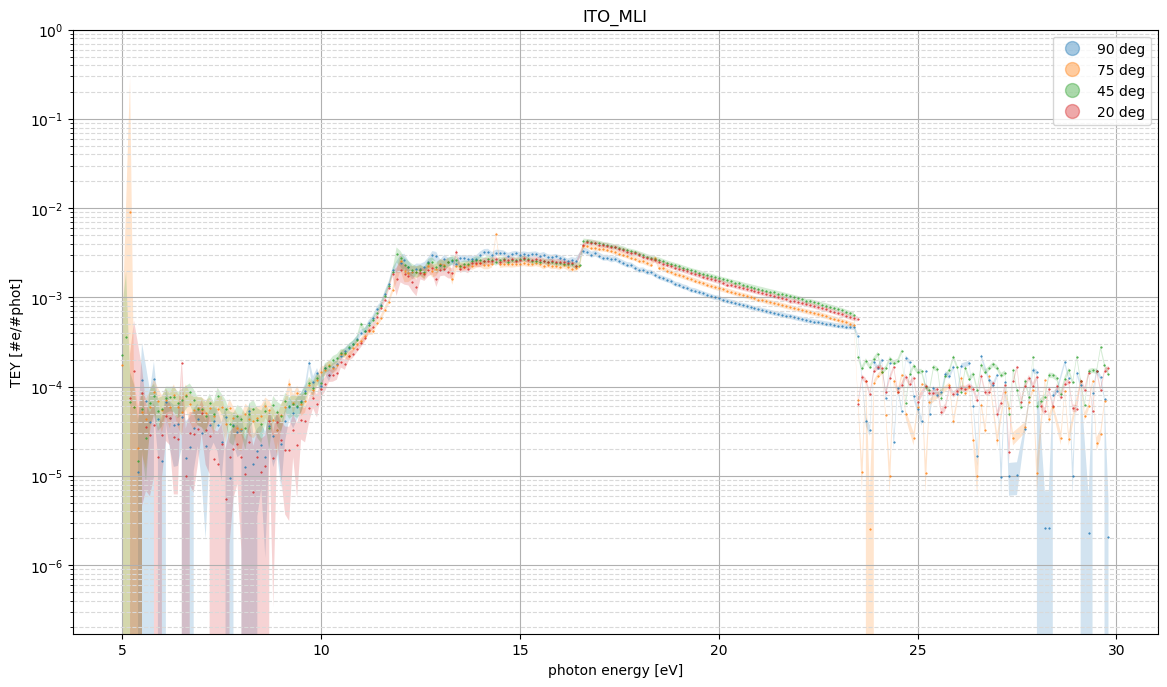

In [13]:
[ITO_MLI_90_E, ITO_MLI_90_TEY, ITO_MLI_90_TEY_err] = read_file('TEY_files/ITO_MLI_90deg.txt')
[ITO_MLI_45_E, ITO_MLI_45_TEY, ITO_MLI_45_TEY_err] = read_file('TEY_files/ITO_MLI_45deg.txt')
[ITO_MLI_75_E, ITO_MLI_75_TEY, ITO_MLI_75_TEY_err] = read_file('TEY_files/ITO_MLI_75deg.txt')
[ITO_MLI_20_E, ITO_MLI_20_TEY, ITO_MLI_20_TEY_err] = read_file('TEY_files/ITO_MLI_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(ITO_MLI_90_E,ITO_MLI_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(ITO_MLI_90_E, [i-j for i,j in zip(ITO_MLI_90_TEY,ITO_MLI_90_TEY_err)], [i+j for i,j in zip(ITO_MLI_90_TEY,ITO_MLI_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_75_E,ITO_MLI_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(ITO_MLI_75_E, [i-j for i,j in zip(ITO_MLI_75_TEY,ITO_MLI_75_TEY_err)], [i+j for i,j in zip(ITO_MLI_75_TEY,ITO_MLI_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_45_E,ITO_MLI_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(ITO_MLI_45_E, [i-j for i,j in zip(ITO_MLI_45_TEY,ITO_MLI_45_TEY_err)], [i+j for i,j in zip(ITO_MLI_45_TEY,ITO_MLI_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_20_E,ITO_MLI_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(ITO_MLI_20_E, [i-j for i,j in zip(ITO_MLI_20_TEY,ITO_MLI_20_TEY_err)], [i+j for i,j in zip(ITO_MLI_20_TEY,ITO_MLI_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO_MLI')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/ITO_MLI.png', dpi=300)

# ITO MLI 1 (backup sample):

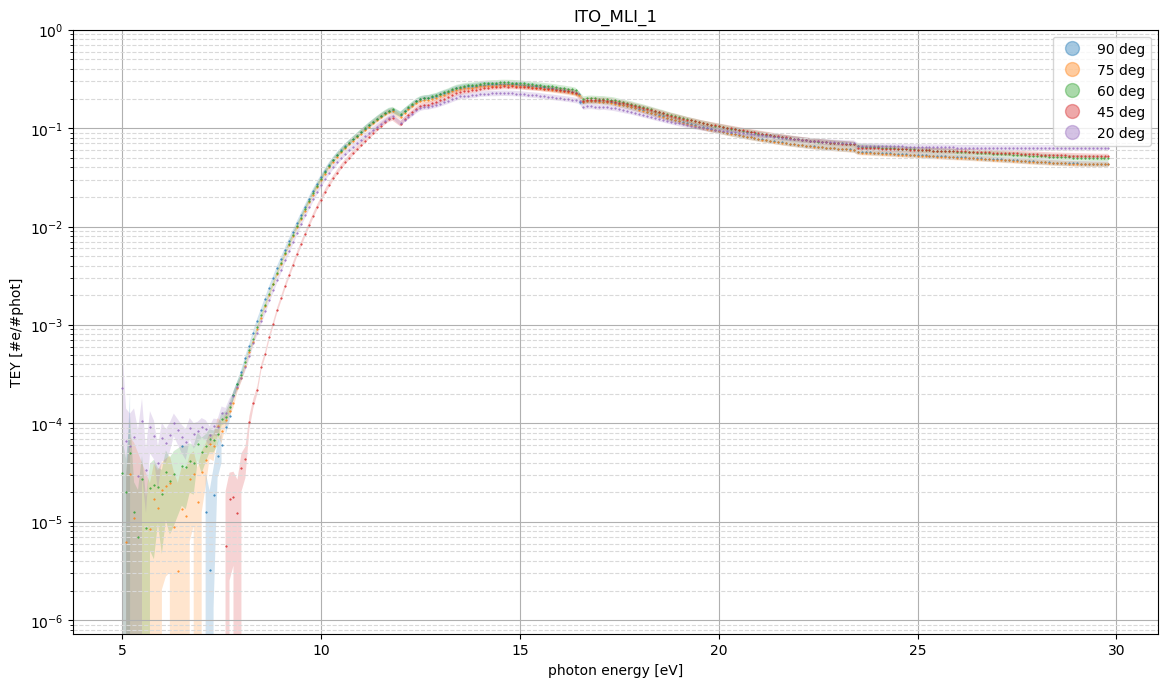

In [15]:
[ITO_MLI_1_90_E, ITO_MLI_1_90_TEY, ITO_MLI_1_90_TEY_err] = read_file('TEY_files/ITO_MLI_1_90deg.txt')
[ITO_MLI_1_45_E, ITO_MLI_1_45_TEY, ITO_MLI_1_45_TEY_err] = read_file('TEY_files/ITO_MLI_1_45deg.txt')
[ITO_MLI_1_60_E, ITO_MLI_1_60_TEY, ITO_MLI_1_60_TEY_err] = read_file('TEY_files/ITO_MLI_1_60deg.txt')
[ITO_MLI_1_75_E, ITO_MLI_1_75_TEY, ITO_MLI_1_75_TEY_err] = read_file('TEY_files/ITO_MLI_1_75deg.txt')
[ITO_MLI_1_20_E, ITO_MLI_1_20_TEY, ITO_MLI_1_20_TEY_err] = read_file('TEY_files/ITO_MLI_1_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(ITO_MLI_1_90_E,ITO_MLI_1_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(ITO_MLI_1_90_E, [i-j for i,j in zip(ITO_MLI_1_90_TEY,ITO_MLI_1_90_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_90_TEY,ITO_MLI_1_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_1_75_E,ITO_MLI_1_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(ITO_MLI_1_75_E, [i-j for i,j in zip(ITO_MLI_1_75_TEY,ITO_MLI_1_75_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_75_TEY,ITO_MLI_1_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_1_60_E,ITO_MLI_1_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(ITO_MLI_1_60_E, [i-j for i,j in zip(ITO_MLI_1_60_TEY,ITO_MLI_1_60_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_60_TEY,ITO_MLI_1_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_1_45_E,ITO_MLI_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(ITO_MLI_1_45_E, [i-j for i,j in zip(ITO_MLI_1_45_TEY,ITO_MLI_1_45_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_45_TEY,ITO_MLI_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_1_20_E,ITO_MLI_1_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(ITO_MLI_1_20_E, [i-j for i,j in zip(ITO_MLI_1_20_TEY,ITO_MLI_1_20_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_20_TEY,ITO_MLI_1_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO_MLI_1')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/ITO_MLI_1.png', dpi=300)

# ITO MLI "2" (original sample once again)

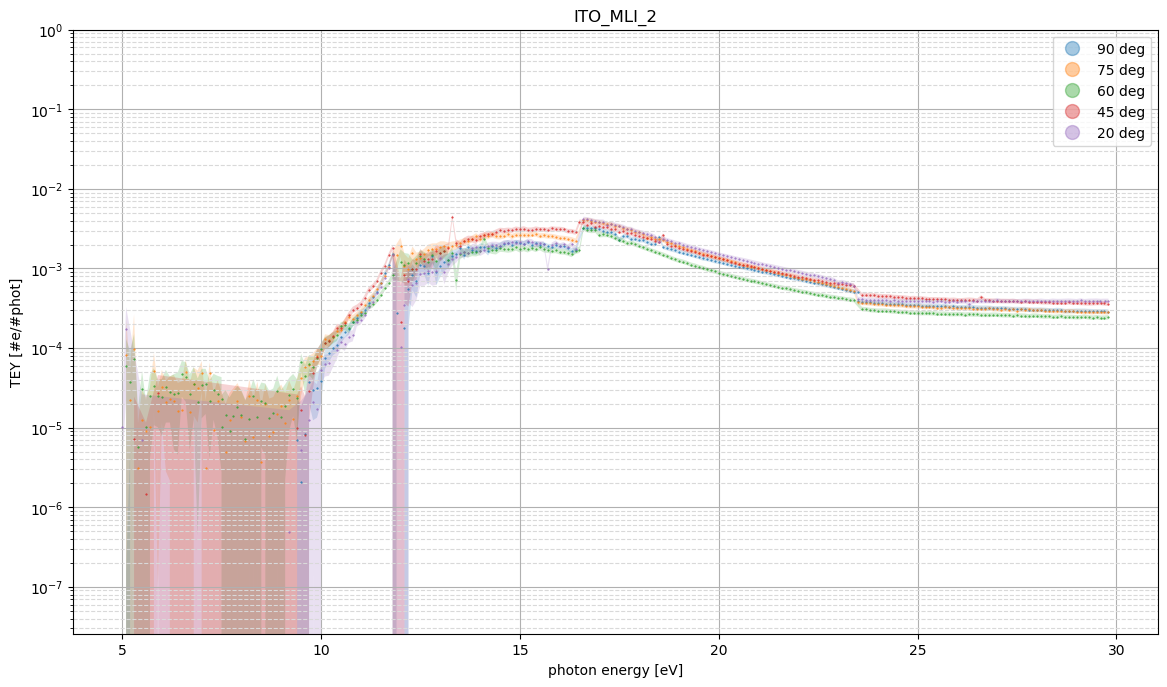

In [16]:
[ITO_MLI_2_90_E, ITO_MLI_2_90_TEY, ITO_MLI_2_90_TEY_err] = read_file('TEY_files/ITO_MLI_2_90deg.txt')
[ITO_MLI_2_45_E, ITO_MLI_2_45_TEY, ITO_MLI_2_45_TEY_err] = read_file('TEY_files/ITO_MLI_2_45deg.txt')
[ITO_MLI_2_60_E, ITO_MLI_2_60_TEY, ITO_MLI_2_60_TEY_err] = read_file('TEY_files/ITO_MLI_2_60deg.txt')
[ITO_MLI_2_75_E, ITO_MLI_2_75_TEY, ITO_MLI_2_75_TEY_err] = read_file('TEY_files/ITO_MLI_2_75deg.txt')
[ITO_MLI_2_20_E, ITO_MLI_2_20_TEY, ITO_MLI_2_20_TEY_err] = read_file('TEY_files/ITO_MLI_2_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(ITO_MLI_2_90_E,ITO_MLI_2_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(ITO_MLI_2_90_E, [i-j for i,j in zip(ITO_MLI_2_90_TEY,ITO_MLI_2_90_TEY_err)], [i+j for i,j in zip(ITO_MLI_2_90_TEY,ITO_MLI_2_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_2_75_E,ITO_MLI_2_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(ITO_MLI_2_75_E, [i-j for i,j in zip(ITO_MLI_2_75_TEY,ITO_MLI_2_75_TEY_err)], [i+j for i,j in zip(ITO_MLI_2_75_TEY,ITO_MLI_2_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_2_60_E,ITO_MLI_2_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(ITO_MLI_2_60_E, [i-j for i,j in zip(ITO_MLI_2_60_TEY,ITO_MLI_2_60_TEY_err)], [i+j for i,j in zip(ITO_MLI_2_60_TEY,ITO_MLI_2_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_2_45_E,ITO_MLI_2_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(ITO_MLI_2_45_E, [i-j for i,j in zip(ITO_MLI_2_45_TEY,ITO_MLI_2_45_TEY_err)], [i+j for i,j in zip(ITO_MLI_2_45_TEY,ITO_MLI_2_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_2_20_E,ITO_MLI_2_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(ITO_MLI_2_20_E, [i-j for i,j in zip(ITO_MLI_2_20_TEY,ITO_MLI_2_20_TEY_err)], [i+j for i,j in zip(ITO_MLI_2_20_TEY,ITO_MLI_2_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('ITO_MLI_2')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/ITO_MLI_2.png', dpi=300)

# Cu tape:

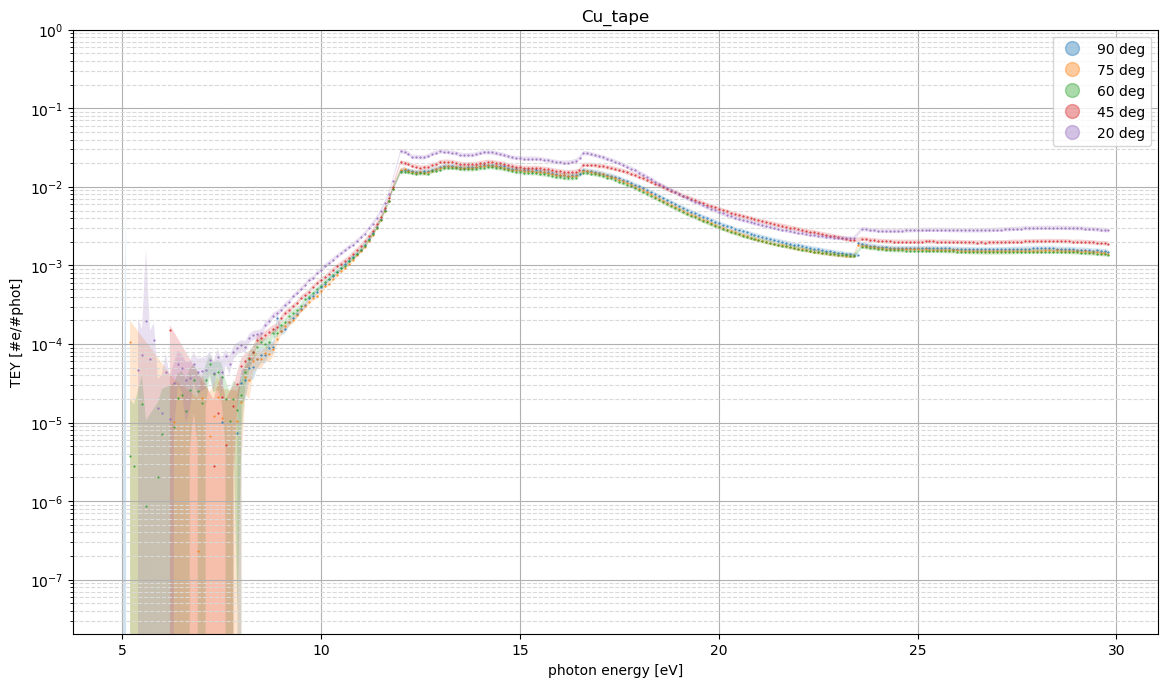

In [17]:
[Cu_tape_90_E, Cu_tape_90_TEY, Cu_tape_90_TEY_err] = read_file('TEY_files/Cu_tape_90deg.txt')
[Cu_tape_45_E, Cu_tape_45_TEY, Cu_tape_45_TEY_err] = read_file('TEY_files/Cu_tape_45deg.txt')
[Cu_tape_60_E, Cu_tape_60_TEY, Cu_tape_60_TEY_err] = read_file('TEY_files/Cu_tape_60deg.txt')
[Cu_tape_75_E, Cu_tape_75_TEY, Cu_tape_75_TEY_err] = read_file('TEY_files/Cu_tape_75deg.txt')
[Cu_tape_20_E, Cu_tape_20_TEY, Cu_tape_20_TEY_err] = read_file('TEY_files/Cu_tape_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Cu_tape_90_E,Cu_tape_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(Cu_tape_90_E, [i-j for i,j in zip(Cu_tape_90_TEY,Cu_tape_90_TEY_err)], [i+j for i,j in zip(Cu_tape_90_TEY,Cu_tape_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Cu_tape_75_E,Cu_tape_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(Cu_tape_75_E, [i-j for i,j in zip(Cu_tape_75_TEY,Cu_tape_75_TEY_err)], [i+j for i,j in zip(Cu_tape_75_TEY,Cu_tape_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Cu_tape_60_E,Cu_tape_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(Cu_tape_60_E, [i-j for i,j in zip(Cu_tape_60_TEY,Cu_tape_60_TEY_err)], [i+j for i,j in zip(Cu_tape_60_TEY,Cu_tape_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Cu_tape_45_E,Cu_tape_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(Cu_tape_45_E, [i-j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], [i+j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Cu_tape_20_E,Cu_tape_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(Cu_tape_20_E, [i-j for i,j in zip(Cu_tape_20_TEY,Cu_tape_20_TEY_err)], [i+j for i,j in zip(Cu_tape_20_TEY,Cu_tape_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Cu_tape')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/Cu_tape.png', dpi=300)

# Fake dust (LHS-1 simulant on Cu tape)

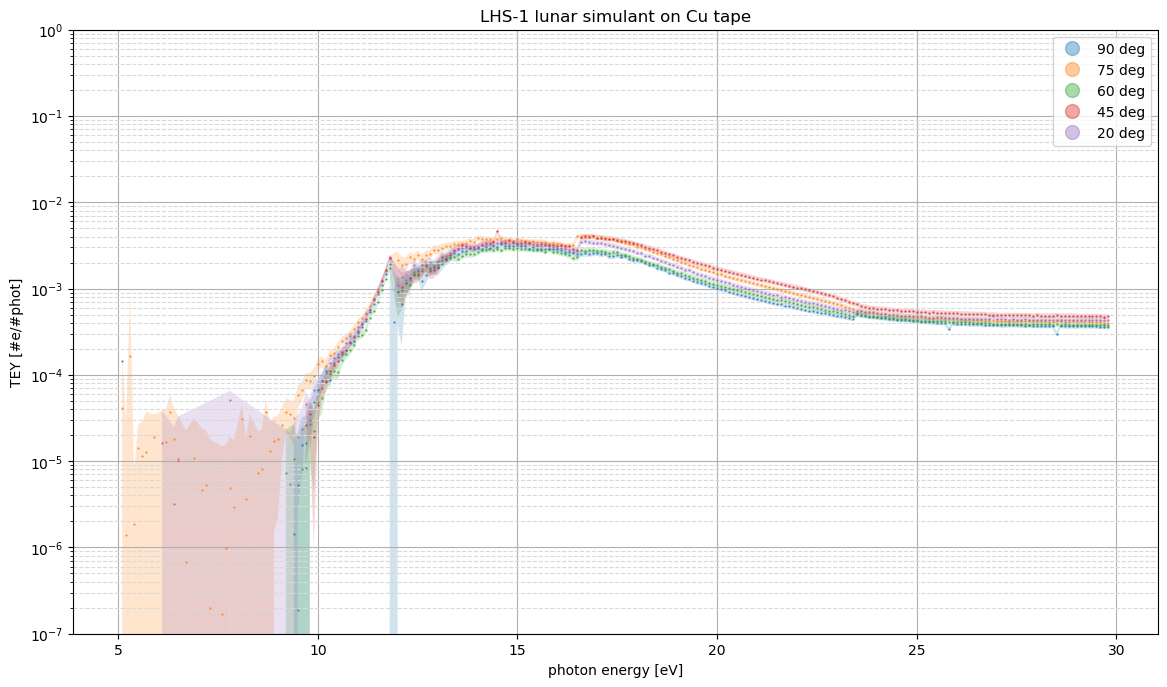

In [18]:
[fake_dust_90_E, fake_dust_90_TEY, fake_dust_90_TEY_err] = read_file('TEY_files/fake_dust_90deg.txt')
[fake_dust_45_E, fake_dust_45_TEY, fake_dust_45_TEY_err] = read_file('TEY_files/fake_dust_45deg.txt')
[fake_dust_60_E, fake_dust_60_TEY, fake_dust_60_TEY_err] = read_file('TEY_files/fake_dust_60deg.txt')
[fake_dust_75_E, fake_dust_75_TEY, fake_dust_75_TEY_err] = read_file('TEY_files/fake_dust_75deg.txt')
[fake_dust_20_E, fake_dust_20_TEY, fake_dust_20_TEY_err] = read_file('TEY_files/fake_dust_20deg.txt')

figure(figsize=(14, 8), dpi=100)
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(fake_dust_90_E,fake_dust_90_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='90 deg')
plt.fill_between(fake_dust_90_E, [i-j for i,j in zip(fake_dust_90_TEY,fake_dust_90_TEY_err)], [i+j for i,j in zip(fake_dust_90_TEY,fake_dust_90_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(fake_dust_75_E,fake_dust_75_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='75 deg')
plt.fill_between(fake_dust_75_E, [i-j for i,j in zip(fake_dust_75_TEY,fake_dust_75_TEY_err)], [i+j for i,j in zip(fake_dust_75_TEY,fake_dust_75_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(fake_dust_60_E,fake_dust_60_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='60 deg')
plt.fill_between(fake_dust_60_E, [i-j for i,j in zip(fake_dust_60_TEY,fake_dust_60_TEY_err)], [i+j for i,j in zip(fake_dust_60_TEY,fake_dust_60_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(fake_dust_45_E,fake_dust_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='45 deg')
plt.fill_between(fake_dust_45_E, [i-j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], [i+j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(fake_dust_20_E,fake_dust_20_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='20 deg')
plt.fill_between(fake_dust_20_E, [i-j for i,j in zip(fake_dust_20_TEY,fake_dust_20_TEY_err)], [i+j for i,j in zip(fake_dust_20_TEY,fake_dust_20_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('LHS-1 lunar simulant on Cu tape')
plt.grid(linestyle='--')
plt.legend(loc="lower right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/fake_dust.png', dpi=300)

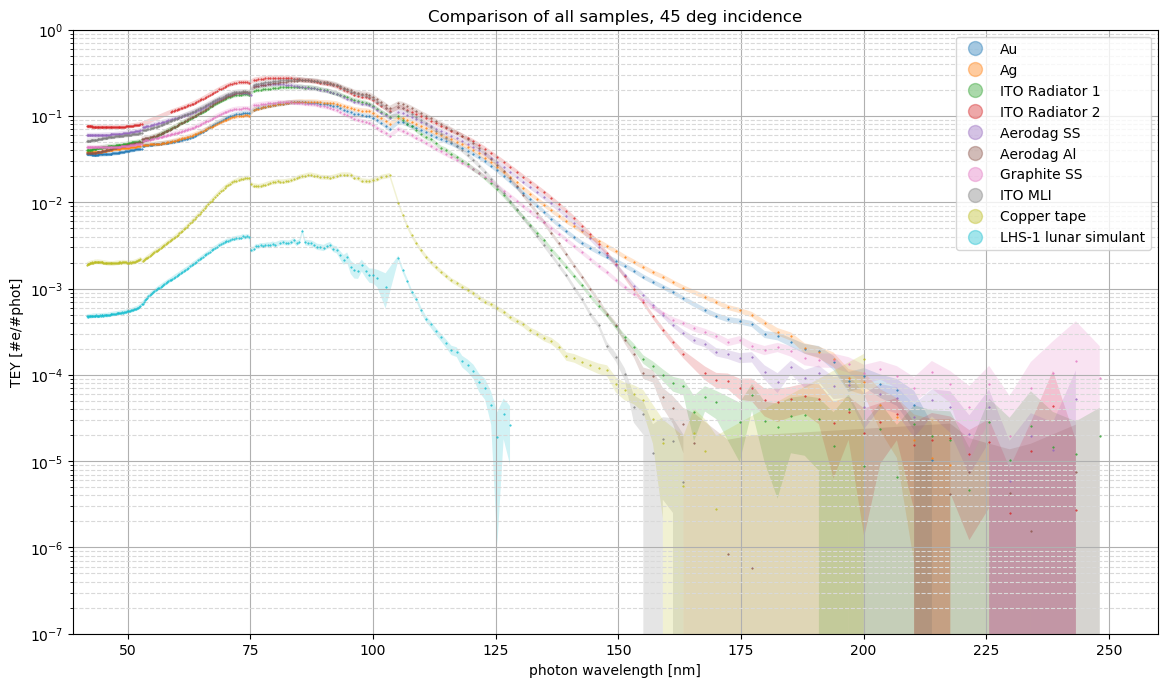

In [41]:
figure(figsize=(14, 8), dpi=100)

marker='.'
markersize=1
linewidth = 0.5
elinewidth = 1
capsize = 1.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(convert_eV_to_wavelength(Au_45_E), Au_45_TEY, linestyle=linestyle,linewidth=linewidth, marker=marker, markersize=markersize, label='Au')
plt.fill_between(convert_eV_to_wavelength(Au_45_E), [i-j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], [i+j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Ag_45_E), Ag_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Ag')
plt.fill_between(convert_eV_to_wavelength(Ag_45_E), [i-j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], [i+j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(ITO_Radiator_1_45_E), ITO_Radiator_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='ITO Radiator 1')
plt.fill_between(convert_eV_to_wavelength(ITO_Radiator_1_45_E), [i-j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(ITO_Radiator_2_45_E), ITO_Radiator_2_45_TEY, linestyle=linestyle, marker=marker, markersize=markersize, label='ITO Radiator 2')
plt.fill_between(convert_eV_to_wavelength(ITO_Radiator_2_45_E), [i-j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Aerodag_SS_45_E), Aerodag_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Aerodag SS')
plt.fill_between(convert_eV_to_wavelength(Aerodag_SS_45_E), [i-j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], [i+j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Aerodag_Al_45_E), Aerodag_Al_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Aerodag Al')
plt.fill_between(convert_eV_to_wavelength(Aerodag_Al_45_E), [i-j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], [i+j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Graphite_SS_45_E), Graphite_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Graphite SS')
plt.fill_between(convert_eV_to_wavelength(Graphite_SS_45_E), [i-j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], [i+j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(ITO_MLI_1_45_E), ITO_MLI_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='ITO MLI')
plt.fill_between(convert_eV_to_wavelength(ITO_MLI_1_45_E), [i-j for i,j in zip(ITO_MLI_1_45_TEY, ITO_MLI_1_45_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_45_TEY,ITO_MLI_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(Cu_tape_45_E), Cu_tape_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Copper tape')
plt.fill_between(convert_eV_to_wavelength(Cu_tape_45_E), [i-j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], [i+j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_wavelength(fake_dust_45_E), fake_dust_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='LHS-1 lunar simulant')
plt.fill_between(convert_eV_to_wavelength(fake_dust_45_E), [i-j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], [i+j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon wavelength [nm]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Comparison of all samples, 45 deg incidence')
plt.grid(linestyle='--')
plt.legend(loc="upper right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(bottom=10e-8,top=1)
plt.xlim(convert_eV_to_wavelength([32])[0], 260)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/comparison_45deg_nm.png', dpi=300)

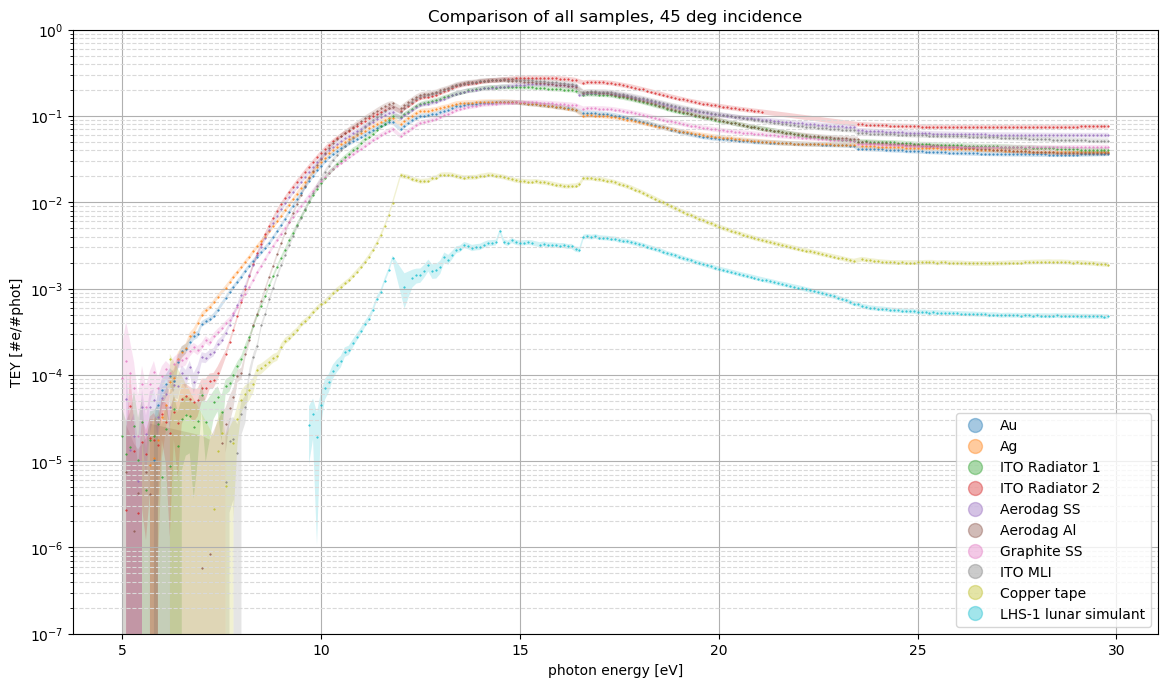

In [42]:
figure(figsize=(14, 8), dpi=100)

marker='.'
markersize=1
linewidth = 0.5
elinewidth = 1
capsize = 1.5
linestyle='none'
alpha=0.2
joinstyle='round'

plt.plot(Au_45_E, Au_45_TEY, linestyle=linestyle,linewidth=linewidth, marker=marker, markersize=markersize, label='Au')
plt.fill_between(Au_45_E, [i-j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], [i+j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Ag_45_E, Ag_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Ag')
plt.fill_between(Ag_45_E, [i-j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], [i+j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_1_45_E, ITO_Radiator_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='ITO Radiator 1')
plt.fill_between(ITO_Radiator_1_45_E, [i-j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_1_45_TEY,ITO_Radiator_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_Radiator_2_45_E, ITO_Radiator_2_45_TEY, linestyle=linestyle, marker=marker, markersize=markersize, label='ITO Radiator 2')
plt.fill_between(ITO_Radiator_2_45_E, [i-j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], [i+j for i,j in zip(ITO_Radiator_2_45_TEY,ITO_Radiator_2_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_SS_45_E, Aerodag_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Aerodag SS')
plt.fill_between(Aerodag_SS_45_E, [i-j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], [i+j for i,j in zip(Aerodag_SS_45_TEY,Aerodag_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Aerodag_Al_45_E, Aerodag_Al_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Aerodag Al')
plt.fill_between(Aerodag_Al_45_E, [i-j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], [i+j for i,j in zip(Aerodag_Al_45_TEY,Aerodag_Al_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Graphite_SS_45_E, Graphite_SS_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Graphite SS')
plt.fill_between(Graphite_SS_45_E, [i-j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], [i+j for i,j in zip(Graphite_SS_45_TEY,Graphite_SS_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(ITO_MLI_1_45_E, ITO_MLI_1_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='ITO MLI')
plt.fill_between(ITO_MLI_1_45_E, [i-j for i,j in zip(ITO_MLI_1_45_TEY, ITO_MLI_1_45_TEY_err)], [i+j for i,j in zip(ITO_MLI_1_45_TEY,ITO_MLI_1_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(Cu_tape_45_E, Cu_tape_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='Copper tape')
plt.fill_between(Cu_tape_45_E, [i-j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], [i+j for i,j in zip(Cu_tape_45_TEY,Cu_tape_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(fake_dust_45_E, fake_dust_45_TEY, linestyle=linestyle, linewidth=linewidth, marker=marker, markersize=markersize, label='LHS-1 lunar simulant')
plt.fill_between(fake_dust_45_E, [i-j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], [i+j for i,j in zip(fake_dust_45_TEY,fake_dust_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.xlabel('photon energy [eV]')
plt.ylabel('TEY [#e/#phot]')
plt.title('Comparison of all samples, 45 deg incidence')
plt.grid(linestyle='--')
plt.legend(loc="upper right")
plt.grid(which = 'major', linestyle='-')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.gca().set_ylim(bottom=10e-8,top=1)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/comparison_45deg_eV.png', dpi=300)